In [1]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pingouin as pg
datafile = '\\Users\\sarac\\OneDrive\\Documenti\\Magistrale_tn\\GeneEnv_Analysis\\dataset.csv'

C:\Users\sarac\miniconda3\envs\work\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.10, the latest is 0.4.0.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
C:\Users\sarac\miniconda3\envs\work\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.0, the latest is 0.2.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
TARGET = 'RRmean_normStimuli'

In [3]:
data = pd.read_csv(datafile)
data.dropna(axis=0, inplace=True)

In [4]:
N_sub = len(data['subject'].unique())

                           W      pval  normal
RRmean_normStimuli  0.959066  0.000146   False


<AxesSubplot:title={'center':'RRmean_normStimuli'}, xlabel='label'>

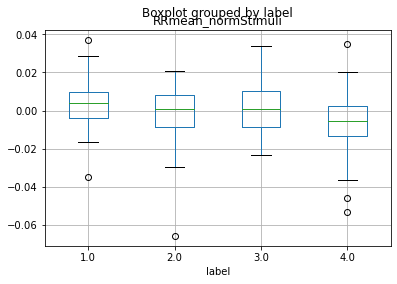

In [5]:
results_normality = pg.normality(data[TARGET])
print(results_normality)
data.boxplot(TARGET, by='label')

In [6]:
#kruskal because not normal
pg.kruskal(data, dv=TARGET, between='label')

Source  ddof1         H     p-unc
Kruskal  label      3  9.722848  0.021075

In [7]:
 U, p = stats.mannwhitneyu(data.query('label == 1')[TARGET], data.query('label== 2')[TARGET])
print(U,p)

665.0 0.17121591370958905


In [8]:
 U, p = stats.mannwhitneyu(data.query('label == 2')[TARGET], data.query('label== 3')[TARGET])
print(U,p)

751.0 0.46416727475270236


In [9]:
 U, p = stats.mannwhitneyu(data.query('label == 3')[TARGET], data.query('label== 4')[TARGET])
print(U,p)

542.0 0.014682289917345923


In [10]:
 U, p = stats.mannwhitneyu(data.query('label == 1')[TARGET], data.query('label== 4')[TARGET])
print(U,p)

466.0 0.0016513964754600009


In [11]:
 U, p = stats.mannwhitneyu(data.query('label == 1')[TARGET], data.query('label== 3')[TARGET])
print(U,p)

703.0 0.2844667974970359


In [12]:
 U, p = stats.mannwhitneyu(data.query('label == 2')[TARGET], data.query('label== 4')[TARGET])
print(U,p)

544.0 0.015441754815082217


In [14]:
envs = ['PBI_M_care',
        'PBI_M_overp',
        'PBI_F_care',
        'PBI_F_overp']

In [15]:
data_label = data.query('label == 1')
for env_col in envs: 
    print(pg.corr(data_label[env_col], data_label[TARGET], method='spearman'))

           n         r          CI95%        r2    adj_r2     p-val     power
spearman  39 -0.049708  [-0.36, 0.27]  0.002471 -0.052947  0.763784  0.060091
           n         r          CI95%       r2    adj_r2     p-val     power
spearman  39  0.071345  [-0.25, 0.38]  0.00509 -0.050183  0.666027  0.071383
           n         r         CI95%        r2    adj_r2     p-val     power
spearman  39  0.097077  [-0.23, 0.4]  0.009424 -0.045608  0.556593  0.090424
           n         r          CI95%        r2    adj_r2     p-val     power
spearman  39  0.138933  [-0.18, 0.44]  0.019302 -0.035181  0.398942  0.135219


In [16]:
data_label = data.query('label == 2')
for env_col in envs: 
    print(pg.corr(data_label[env_col], data_label[TARGET], method='spearman'))

           n         r          CI95%        r2    adj_r2     p-val     power
spearman  39  0.047071  [-0.27, 0.36]  0.002216 -0.053217  0.775988  0.058999
           n        r          CI95%        r2   adj_r2     p-val     power
spearman  39 -0.30365  [-0.57, 0.01]  0.092203  0.04177  0.060212  0.476844
           n         r          CI95%        r2   adj_r2     p-val     power
spearman  39  0.072351  [-0.25, 0.38]  0.005235 -0.05003  0.661598  0.072011
           n         r          CI95%        r2    adj_r2     p-val     power
spearman  39 -0.230946  [-0.51, 0.09]  0.053336  0.000744  0.157203  0.297007


In [18]:
data_label = data.query('label == 3')
for env_col in envs: 
    print(pg.corr(data_label[env_col], data_label[TARGET], method='spearman'))

           n         r          CI95%        r2    adj_r2     p-val     power
spearman  39 -0.077099  [-0.38, 0.24]  0.005944 -0.049281  0.640849  0.075102
           n         r          CI95%        r2    adj_r2     p-val     power
spearman  39 -0.138124  [-0.43, 0.19]  0.019078 -0.035417  0.401722  0.134184
           n         r          CI95%        r2    adj_r2     p-val     power
spearman  39  0.053504  [-0.27, 0.36]  0.002863 -0.052534  0.746324  0.061768
           n         r          CI95%        r2    adj_r2     p-val     power
spearman  39  0.025796  [-0.29, 0.34]  0.000665 -0.054853  0.876127  0.052409


In [19]:
data_label = data.query('label == 4')
for env_col in envs: 
    print(pg.corr(data_label[env_col], data_label[TARGET], method='spearman'))

           n       r          CI95%        r2    adj_r2     p-val     power
spearman  39 -0.0491  [-0.36, 0.27]  0.002411 -0.053011  0.766596  0.059833
           n         r          CI95%        r2   adj_r2     p-val     power
spearman  39 -0.073071  [-0.38, 0.25]  0.005339 -0.04992  0.658437  0.072466
           n         r          CI95%        r2    adj_r2     p-val     power
spearman  39  0.110655  [-0.21, 0.41]  0.012245 -0.042631  0.502461  0.103033
           n         r          CI95%        r2   adj_r2     p-val     power
spearman  39 -0.315749  [-0.57, -0.0]  0.099697  0.04968  0.050217  0.509229
